# José Domingo Cajina Ramírez
13/02/2020


---






Realizar graficos que ayuden a representar mejor los datos de las tablas: lluvias y temperaturas, salarios-minimos,tabulador.

In [0]:
#Importando librerias que usaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/Semana2/201901010000Lluv.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/Semana2/201901010000TMax.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/Semana2/201901010000TMed.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/Semana2/201901010000TMin.csv

In [0]:
# 1)  Tabla de Lluvias y temperatura
data_lluvia = pd.read_csv("201901010000Lluv.csv", encoding='Latin-1')
data_Tmax = pd.read_csv("201901010000TMax.csv", encoding='Latin-1')
data_Tmed = pd.read_csv("201901010000TMed.csv", encoding='Latin-1')
data_Tmin = pd.read_csv("201901010000TMin.csv", encoding='Latin-1')


In [14]:
temp = pd.merge(data_Tmax,data_Tmed)
tempe = pd.merge(temp,data_Tmin)
data_lluvia.rename(columns=lambda m: m.capitalize())

,Lon,Lat,Edo,Clave_sih,Nombre,Ene
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70
...,...,...,...,...,...,...
1236,-102.344167,23.288611,ZAC,VCOZC,"Villa de Cos, Zac.",7.00
1237,-101.916944,22.520278,ZAC,VGOZC,"Villa González Ortega, Zac.",32.32
1238,-101.715833,22.347500,ZAC,VHGZC,"Villa Hidalgo, Zac.",9.70
1239,-103.337500,21.588889,ZAC,VILZC,"José María Morelos, Zac.",15.20


In [0]:
Base_Data = pd.merge(tempe, data_lluvia, left_index=True, right_index=True)

In [17]:
Base_Data

,Lon,Lat,Clave,Edo,Est,Tmax,Tmed,Tmin,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
0,-99.75,16.76,76805,GRO,ACAPULCO,33.277419,27.441935,21.606452,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-111.83,30.71,76113,SON,ALTAR,20.868966,13.462069,6.055172,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60
2,-93.90,16.24,76840,CHIS,ARRIAGA,34.464516,28.088710,21.712903,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50
3,-90.50,19.83,76695,CAMP,CAMPECHE,29.400000,23.374074,17.348148,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,27.429032,17.987097,8.545161,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,-99.24,19.47,CCH N,MEX,CCH Naucalpan,22.187097,15.232258,8.277419,-101.050000,19.490000,MICH,PDBMC,"Planta de Bombeo, Mich.",21.00
631,-99.80,19.63,SMLMX,MEX,Santa María del Llano Méx.,24.612903,11.161290,-2.290323,-102.601389,19.959167,MICH,PDEGONZALO,"Presa de Gonzalo, Mich. SGT*",4.40
632,-95.93,17.15,ZACOX,OAX,Zacatepec Oax.,20.354167,16.697917,13.041667,-102.431389,20.303056,MICH,PJARIPO,"Presa Jaripo, Mich. SGT*",14.00
633,-95.52,18.63,NLTVC,VER,Naranjal Lerdo de Tejada Ver.,26.692308,22.269231,17.846154,-101.600000,20.300000,MICH,PORMC,"Pastor Ortiz, Mich.",0.82


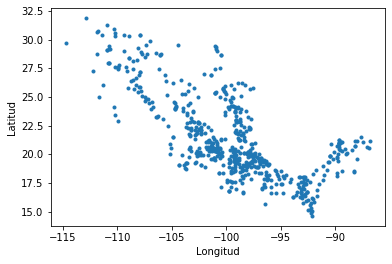

In [78]:
"""
En Teoría si graficamos latitud contra latitud obtendremos el mapa de México,
y podemos aprenciar que en efecto, obtenemos un boceto del mapa.
"""
plt.scatter(Base_Data['Lon'], Base_Data['Lat'], marker='.')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

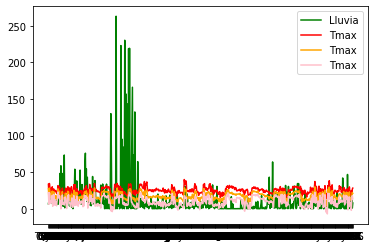

In [81]:
"""
En esta gráfica vamos a primeramente mapear los valores de los estados
con la funcion xticks, para asignar un valor a cada estado de 0 al range.
De esta manera podremos usarlos como dominio sin obtener un desorden a la hora
de graficar.

Y en segundo lugar, vamos a agregar la data de temperaturas, y el indice ENE,
Para poder comparar como se comporta cada estado.

Entonces prodría ser interesante y de importancia ver si existe alguna
correlación entre las temperaturas, y coeficiente de lluvias, con los estados
colindantes y estudiar asi el movimiento del clima y de las nubes.

Si compararamos esta data con la de años pasados o futuros, podriamos ver
la correlacion territorial que hay en México hablando de climas.

"""
Estados = Base_Data["Edo"]
mapear = range(len(Estados))
plt.xticks(mapear, Estados)

plt.plot(Base_Data["ENE"],label="Lluvia",color="green")
plt.legend()

plt.plot(Base_Data["Tmax"],label="Tmax", color="red")
plt.legend()

plt.plot(Base_Data["Tmed"],label="Tmax", color="orange")
plt.legend()

plt.plot(Base_Data["Tmin"],label="Tmax", color="pink")
plt.legend()

#Aqui podemos hacer un "zoom" para vizualizar ciertos estados solamente
#plt.xlim(20,30)

plt.show()

In [0]:
#Ahora vamos a visualizar los datos de tabulador
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/tabulador.csv

In [215]:
tabulador = pd.read_csv('tabulador.csv', encoding='Latin-1')
#tabulador.index["TIPO"]
#tabulador.drop("TIPO")
tabulador["TIPO"]


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
74    NaN
75      A
76      A
77      A
78      A
Name: TIPO, Length: 79, dtype: object

In [205]:
type(tabulador["ISSSTE"])
tabulador["ISSSTE"].sum()
tabulador.drop("TIPO")
tabulador = tabulador.astype(float)

KeyError: ignored